# ECommerce Transactions EDA

### AIM : 
- Perform the Exploratory Data Analysis (EDA) on Customers, Products and Transactions Datasets and Find out business insights.

### Data Description
#### 1.Customers.csv
- CustomerID: Unique identifier for each customer.
- CustomerName: Name of the customer.
- Region: Continent where the customer resides.
- SignupDate: Date when the customer signed up.
#### 2. Products.csv
- ProductID: Unique identifier for each product.
- ProductName: Name of the product.
- Category: Product category.
- Price: Product price in USD.
#### 3. Transactions.csv
- TransactionID: Unique identifier for each transaction.
- CustomerID: ID of the customer who made the transaction.
- ProductID: ID of the product sold.
- TransactionDate: Date of the transaction.
- Quantity: Quantity of the product purchased.
- TotalValue: Total value of the transaction.
- Price: Price of the product sold.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Explore the Customers data

In [2]:
# read the Customers csv file
customer_df=pd.read_csv("Customers.csv")

In [3]:
customer_df.shape

(200, 4)

- Total 200 Customers and 4 features

In [4]:
customer_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [6]:
# Check whether any duplicates in the dataset
customer_df.duplicated().sum()

0

In [8]:
# Find out whether any missing values in the dataset.
customer_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

- No duplicates and No missing values in the Customers data.

In [9]:
print("No of unique Customer IDs :",customer_df['CustomerID'].nunique())
print("No of unique Customer Names :",customer_df['CustomerName'].nunique())

No of unique Customer IDs : 200
No of unique Customer Names : 200


In [10]:
print("No of Unique Regions :",customer_df['Region'].nunique())

No of Unique Regions : 4


In [11]:
# explore what are the region in the dataset.
customer_df['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [12]:
# Extract the Signup year from Signup date
customer_df['SignUp Year']=customer_df['SignupDate'].str.split("-").str[0]

In [14]:
customer_df['SignUp Year'].value_counts()

SignUp Year
2024    79
2022    64
2023    57
Name: count, dtype: int64

In [13]:
customer_df.head()

,CustomerID,CustomerName,Region,SignupDate,SignUp Year
0,C0001,Lawrence Carroll,South America,2022-07-10,2022
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022
2,C0003,Michael Rivera,South America,2024-03-07,2024
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022
4,C0005,Laura Weber,Asia,2022-08-15,2022


- A total of 200 customers.
- All the customers belong to four different regions.
- Most of the customers signed up in 2024.

### Explore the Products Data

In [15]:
product_df=pd.read_csv("Products.csv")

In [16]:
product_df.shape

(100, 4)

- Total 100 products with 4 features

In [17]:
product_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [18]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [19]:
# find out whether any missing values in the products data
product_df.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [21]:
# find out whether any duplicates in the data
product_df.duplicated().sum()

0

- No missing values and No duplicates in the products data

In [26]:
print(f"No of Unique Products IDs : {product_df['ProductID'].nunique()}")
print(f"No of Unique Products: {product_df['ProductName'].nunique()}")

No of Unique Products IDs : 100
No of Unique Products: 66


In [27]:
product_df['ProductName'].value_counts()

ProductName
ActiveWear Smartwatch         4
SoundWave Headphones          4
BookWorld Biography           3
TechPro T-Shirt               3
SoundWave Cookbook            3
                             ..
BookWorld Jacket              1
ComfortLiving Smartphone      1
SoundWave T-Shirt             1
ComfortLiving Cookware Set    1
SoundWave Laptop              1
Name: count, Length: 66, dtype: int64

In [28]:
product_df[product_df['ProductName']=='ActiveWear Smartwatch']

,ProductID,ProductName,Category,Price
1,P002,ActiveWear Smartwatch,Electronics,346.30
49,P050,ActiveWear Smartwatch,Electronics,437.65
76,P077,ActiveWear Smartwatch,Electronics,265.51
82,P083,ActiveWear Smartwatch,Electronics,455.72


In [29]:
product_df[product_df['ProductName']=='SoundWave Headphones']

,ProductID,ProductName,Category,Price
26,P027,SoundWave Headphones,Electronics,229.06
30,P031,SoundWave Headphones,Electronics,196.40
87,P088,SoundWave Headphones,Electronics,263.55
95,P096,SoundWave Headphones,Electronics,307.47


In [30]:
# Find No of products that have the same product name but different product IDs.
product_name_counts = product_df['ProductName'].value_counts()

duplicate_products = product_name_counts[product_name_counts > 1]

In [31]:
duplicate_products

ProductName
ActiveWear Smartwatch       4
SoundWave Headphones        4
BookWorld Biography         3
TechPro T-Shirt             3
SoundWave Cookbook          3
ActiveWear Jacket           3
HomeSense T-Shirt           3
BookWorld Sweater           2
SoundWave Novel             2
ActiveWear Headphones       2
SoundWave Mystery Book      2
HomeSense Rug               2
TechPro Vase                2
SoundWave Smartwatch        2
TechPro Novel               2
BookWorld Cookbook          2
HomeSense Desk Lamp         2
ActiveWear Cookware Set     2
TechPro Textbook            2
ComfortLiving Biography     2
HomeSense Sweater           2
ActiveWear Textbook         2
ActiveWear Running Shoes    2
ActiveWear Rug              2
SoundWave Desk Lamp         2
Name: count, dtype: int64

In [32]:
len(duplicate_products)

25

In [33]:
# Explore the Category feature
product_df['Category'].nunique()

4

In [34]:
product_df['Category'].value_counts()

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

- A total of 100 product IDs.
- A total of 66 products.
- Four different categories: Books, Electronics, Clothing, and Home Decor.

### Explore the Transactions Data

In [35]:
transaction_df=pd.read_csv("Transactions.csv")

In [38]:
transaction_df.shape

(1000, 7)

- Total 1000 Transactions and 7 features

In [39]:
transaction_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [40]:
transaction_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [41]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [42]:
transaction_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [43]:
transaction_df.duplicated().sum()

0

- No missing and Duplicated in the transaction data.

In [44]:
transaction_df["CustomerID"].nunique()

199

In [45]:
transaction_df["CustomerID"].value_counts()[:10]

CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
C0008    10
C0147     9
C0093     9
C0075     9
C0084     9
Name: count, dtype: int64

In [46]:
transaction_df["ProductID"].nunique()

100

In [47]:
transaction_df["ProductID"].value_counts()[:10]

ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
P061    16
P048    15
P022    15
P096    15
P049    15
Name: count, dtype: int64

- 199 customers made transactions, and 100 products are included in the transactions.

In [59]:
df=pd.merge(customer_df,transaction_df,on='CustomerID',how='left')

In [60]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,SignUp Year,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Transaction year,Transaction Month
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00015,P054,2024-01-19 03:12:55,2.0,114.60,57.30,2024.0,1.0
1,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00932,P022,2024-09-17 09:01:18,3.0,412.62,137.54,2024.0,9.0
2,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00085,P096,2024-04-08 00:01:00,2.0,614.94,307.47,2024.0,4.0
3,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00445,P083,2024-05-07 03:11:44,2.0,911.44,455.72,2024.0,5.0
4,C0001,Lawrence Carroll,South America,2022-07-10,2022,T00436,P029,2024-11-02 17:04:16,3.0,1300.92,433.64,2024.0,11.0


In [61]:
df.isnull().sum()

CustomerID           0
CustomerName         0
Region               0
SignupDate           0
SignUp Year          0
TransactionID        1
ProductID            1
TransactionDate      1
Quantity             1
TotalValue           1
Price                1
Transaction year     1
Transaction Month    1
dtype: int64

In [62]:
df[df['TransactionID'].isnull()]

,CustomerID,CustomerName,Region,SignupDate,SignUp Year,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Transaction year,Transaction Month
904,C0180,Amy Carpenter,Asia,2023-10-25,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Customer Amy Carpenter with Customer ID "C0180" did not make any transactions.

In [48]:
transaction_df[transaction_df['ProductID']=='P002']

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
838,T00159,C0163,P002,2024-10-12 03:12:30,4,1385.2,346.3
839,T00248,C0067,P002,2024-05-03 21:36:31,4,1385.2,346.3
840,T00285,C0068,P002,2024-04-02 02:23:50,3,1038.9,346.3
841,T00402,C0031,P002,2024-11-24 17:22:38,2,692.6,346.3
842,T00648,C0003,P002,2024-08-24 18:54:04,4,1385.2,346.3
843,T00706,C0181,P002,2024-07-01 00:11:31,3,1038.9,346.3
844,T00717,C0186,P002,2024-09-21 05:32:31,2,692.6,346.3
845,T00780,C0102,P002,2024-02-14 14:25:57,3,1038.9,346.3


In [49]:
# Extract the Transaction Year and Month from Transaction Date
transaction_df['Transaction year']=transaction_df['TransactionDate'].str.split(" ").str[0].str.split("-").str[0]
transaction_df['Transaction Month']=transaction_df['TransactionDate'].str.split(" ").str[0].str.split("-").str[1]

In [50]:
transaction_df['Transaction year']=transaction_df['Transaction year'].astype(int)
transaction_df['Transaction Month']=transaction_df['Transaction Month'].astype(int)

In [51]:
transaction_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Transaction year,Transaction Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,8
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,5
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,4
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,3
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,3


In [52]:
transaction_df['Transaction year'].value_counts()

Transaction year
2024    996
2023      4
Name: count, dtype: int64

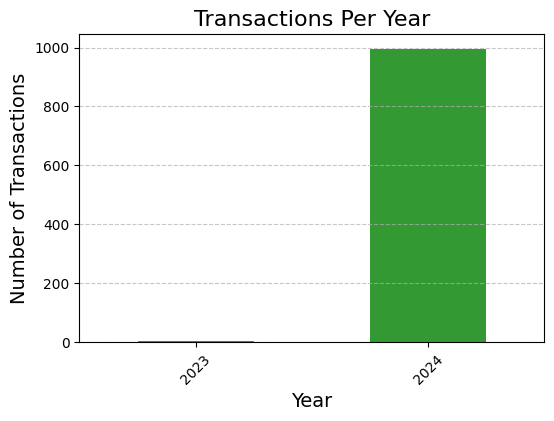

In [53]:
yearly_transactions = transaction_df['Transaction year'].value_counts()
# sort the count values
yearly_transactions = yearly_transactions.sort_index()
# plot the graph about number of transaction per year
plt.figure(figsize=(6, 4))
yearly_transactions.plot(kind='bar', color='green', alpha=0.8)
plt.title("Transactions Per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Transactions", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [54]:
transaction_df[transaction_df['Transaction year']==2023]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Transaction year,Transaction Month
32,T00605,C0017,P057,2023-12-31 03:27:43,4,958.80,239.70,2023,12
225,T00869,C0081,P061,2023-12-30 15:29:12,2,313.92,156.96,2023,12
729,T00845,C0154,P083,2023-12-31 15:44:04,2,911.44,455.72,2023,12
822,T00154,C0040,P020,2023-12-31 06:53:54,4,1585.36,396.34,2023,12


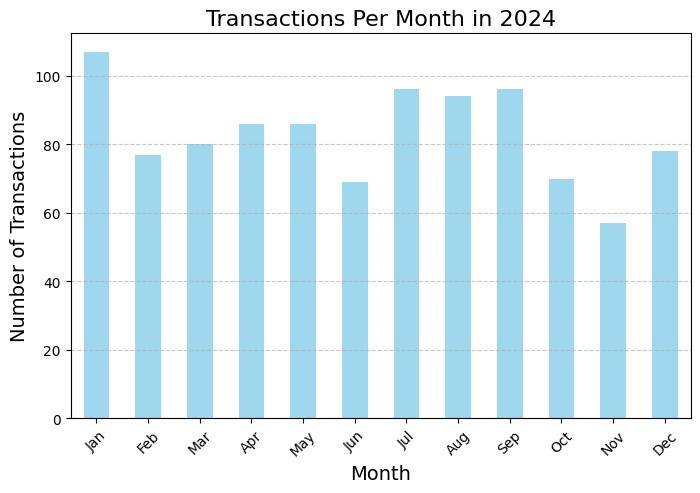

In [63]:
monthly_transactions=transaction_df[transaction_df['Transaction year']==2024]['Transaction Month'].value_counts()
monthly_transactions = monthly_transactions.sort_index()
# Plot the Transactions per month
plt.figure(figsize=(8, 5))
monthly_transactions.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Transactions Per Month in 2024", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Transactions", fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [64]:
#Most Transaction Customer
top_customer=transaction_df['CustomerID'].value_counts().head(5).reset_index()
top_customer.columns = ['CustomerID', 'TransactionCount']
top_customers_details = pd.merge(top_customer, customer_df, on='CustomerID', how='inner')
top_customers_details

,CustomerID,TransactionCount,CustomerName,Region,SignupDate,SignUp Year
0,C0109,11,Abigail Jones,North America,2022-05-09,2022
1,C0156,11,William Adams,North America,2023-08-19,2023
2,C0141,10,Paul Parsons,Europe,2023-02-23,2023
3,C0175,10,Matthew Johnson,Asia,2022-04-16,2022
4,C0065,10,Gerald Hines,North America,2024-07-10,2024


In [65]:
# Most Transaction Products
top_products=transaction_df['ProductID'].value_counts().head(10).reset_index()
top_products.columns=["ProductID",'No of Purchases']
top_purchase_product=pd.merge(top_products,product_df,on='ProductID',how='inner')
top_purchase_product

,ProductID,No of Purchases,ProductName,Category,Price
0,P059,19,SoundWave Jeans,Clothing,303.20
1,P029,17,TechPro Headphones,Electronics,433.64
2,P062,16,HomeSense Novel,Books,374.16
3,P079,16,ActiveWear Rug,Home Decor,417.37
4,P054,16,SoundWave Cookbook,Books,57.30
5,P061,16,HomeSense Desk Lamp,Home Decor,156.96
6,P048,15,TechPro Cookbook,Books,416.40
7,P022,15,HomeSense Wall Art,Home Decor,137.54
8,P096,15,SoundWave Headphones,Electronics,307.47
9,P049,15,TechPro Textbook,Books,147.95


In [66]:
# Top Spending Customer
top_purchase_customer=transaction_df.groupby("CustomerID")['TotalValue'].sum().nlargest(10).reset_index()
top_purchase_customer.columns = ['CustomerID', 'TotalSpending']
top_purchase_customer_details = pd.merge(top_purchase_customer, customer_df, on='CustomerID', how='inner')
top_purchase_customer_details

,CustomerID,TotalSpending,CustomerName,Region,SignupDate,SignUp Year
0,C0141,10673.87,Paul Parsons,Europe,2023-02-23,2023
1,C0054,8040.39,Bruce Rhodes,Asia,2024-09-29,2024
2,C0065,7663.70,Gerald Hines,North America,2024-07-10,2024
3,C0156,7634.45,William Adams,North America,2023-08-19,2023
4,C0082,7572.91,Aimee Taylor,South America,2022-05-13,2022
5,C0188,7111.32,Anna Ball,South America,2022-05-17,2022
6,C0059,7073.28,Mrs. Kimberly Wright,North America,2024-04-07,2024
7,C0028,6819.57,Jennifer Pena,Asia,2024-06-29,2024
8,C0099,6715.72,Rodney Eaton,South America,2023-01-29,2023
9,C0165,6708.10,Juan Mcdaniel,South America,2022-04-09,2022


In [67]:
# Most Purchased Product 
most_purchased_products = transaction_df.groupby('ProductID')['Quantity'].sum().nlargest(5).reset_index()
most_purchased_products.columns = ['ProductID', 'TotalQuantitySold']
most_purchased_products_details=pd.merge(most_purchased_products,product_df,on='ProductID',how='inner')
most_purchased_products_details

,ProductID,TotalQuantitySold,ProductName,Category,Price
0,P054,46,SoundWave Cookbook,Books,57.30
1,P059,46,SoundWave Jeans,Clothing,303.20
2,P029,45,TechPro Headphones,Electronics,433.64
3,P048,43,TechPro Cookbook,Books,416.40
4,P057,43,ActiveWear Smartphone,Electronics,239.70


In [68]:
product_revenue = transaction_df.groupby('ProductID')['TotalValue'].sum().nlargest(5).reset_index()
product_revenue.columns = ['ProductID', 'RevenueGenerated']
product_revenue=pd.merge(product_revenue,product_df,on='ProductID',how='inner')
product_revenue

,ProductID,RevenueGenerated,ProductName,Category,Price
0,P029,19513.80,TechPro Headphones,Electronics,433.64
1,P079,17946.91,ActiveWear Rug,Home Decor,417.37
2,P048,17905.20,TechPro Cookbook,Books,416.40
3,P020,15060.92,ActiveWear Jacket,Clothing,396.34
4,P062,14592.24,HomeSense Novel,Books,374.16


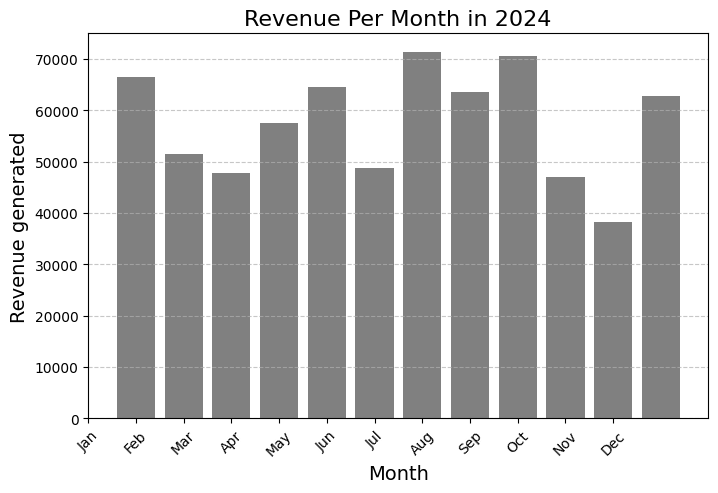

In [69]:
# Revenue Generated by each Month

monthly_revenue = transaction_df.groupby('Transaction Month')['TotalValue'].sum().reset_index()

plt.figure(figsize=(8, 5))
# monthly_revenue.plot(kind='bar', color='gray', alpha=0.8)
plt.bar(monthly_revenue['Transaction Month'],monthly_revenue['TotalValue'],color='gray')
plt.title("Revenue Per Month in 2024", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Revenue generated", fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [70]:
merged_df = pd.merge(transaction_df, product_df, on='ProductID', how='inner')

category_transaction_counts = merged_df['Category'].value_counts().reset_index()
category_transaction_counts.columns = ['Category', 'TransactionCount']
category_transaction_counts

,Category,TransactionCount
0,Books,270
1,Electronics,254
2,Home Decor,248
3,Clothing,228


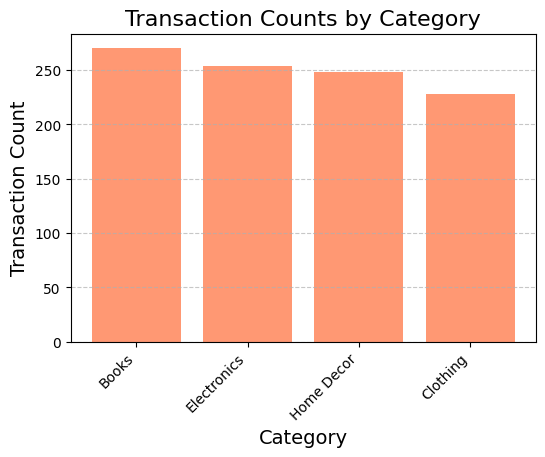

In [71]:
#Plot the graph of Transaction Count for Each Category

plt.figure(figsize=(6, 4))
plt.bar(category_transaction_counts['Category'], category_transaction_counts['TransactionCount'], color='coral', alpha=0.8)

plt.title("Transaction Counts by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Transaction Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [72]:
category_revenue=merged_df.groupby("Category")['TotalValue'].sum().reset_index()
category_revenue

,Category,TotalValue
0,Books,192147.47
1,Clothing,166170.66
2,Electronics,180783.50
3,Home Decor,150893.93


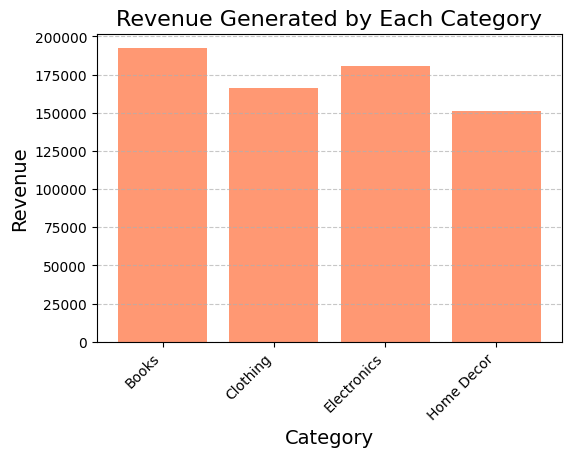

In [73]:
#Plot the graph Revenue Generated for Each Category

plt.figure(figsize=(6, 4))
plt.bar(category_revenue['Category'], category_revenue['TotalValue'], color='coral', alpha=0.8)

plt.title("Revenue Generated by Each Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [74]:
category_quantity=merged_df.groupby("Category")['Quantity'].sum().reset_index()
category_quantity

,Category,Quantity
0,Books,681
1,Clothing,590
2,Electronics,627
3,Home Decor,639


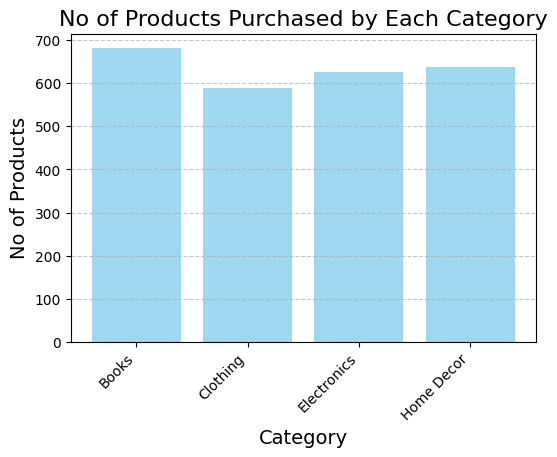

In [75]:
# Plotting No of Products purchased for each category
plt.figure(figsize=(6, 4))
plt.bar(category_quantity['Category'], category_quantity['Quantity'], color='skyblue', alpha=0.8)

plt.title("No of Products Purchased by Each Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("No of Products", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [76]:
merged_df = pd.merge(transaction_df, customer_df, on='CustomerID', how='inner')

In [77]:
region_transaction_counts = merged_df['Region'].value_counts().reset_index()
region_transaction_counts.columns = ['Region', 'TransactionCount']
region_transaction_counts

,Region,TransactionCount
0,South America,304
1,North America,244
2,Europe,234
3,Asia,218


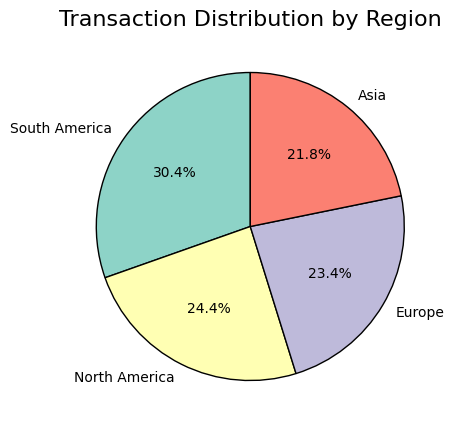

In [78]:
# Plotting the Transaction count for Each Region
plt.figure(figsize=(5, 5))
plt.pie(
    region_transaction_counts['TransactionCount'],
    labels=region_transaction_counts['Region'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3.colors,  # Optional color scheme
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Transaction Distribution by Region", fontsize=16)
plt.show()

In [79]:
region_revenue=merged_df.groupby("Region")['TotalValue'].sum().reset_index()
region_revenue

,Region,TotalValue
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56


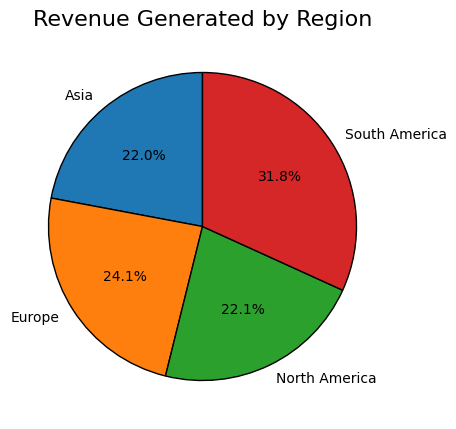

In [80]:
#Revenue Generated by Each Region 
plt.figure(figsize=(5, 5))
plt.pie(
    region_revenue['TotalValue'],
    labels=region_revenue['Region'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Revenue Generated by Region", fontsize=16)
plt.show()

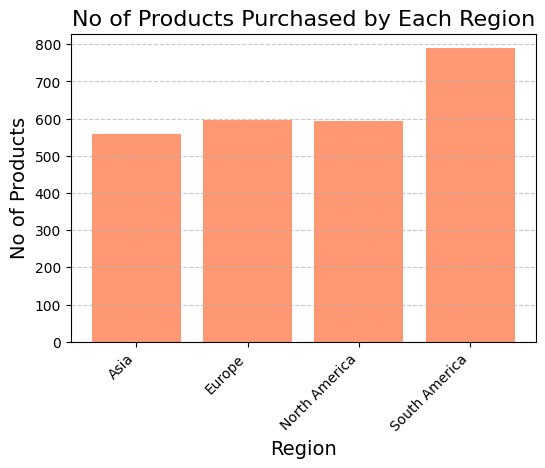

In [82]:
region_quantity=merged_df.groupby("Region")['Quantity'].sum().reset_index()

# Plot the No of Products Purchased for Each Region
plt.figure(figsize=(6, 4))
plt.bar(region_quantity['Region'], region_quantity['Quantity'], color='coral', alpha=0.8)


plt.title("No of Products Purchased by Each Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("No of Products", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [83]:
average_purchase = transaction_df['TotalValue'].mean()
print(f"Average Order Value: ${average_purchase:.2f}")


Average Order Value: $690.00


In [84]:
repeat_customers = transaction_df['CustomerID'].value_counts()
repeat_percentage = (repeat_customers[repeat_customers > 1].count() / len(customer_df)) * 100
print(f"Percentage of Repeat Customers: {repeat_percentage:.2f}%")

Percentage of Repeat Customers: 93.50%


## EDA Conclusion
- All transactions were made in 2023 and 2024, with 99% of transactions occurring in 2024.
- January 2024 had the highest number of transactions.
- August and October 2024 generated the highest revenue, exceeding 70,000(dollars) from product sales.
- Paul Parsons from Europe is the highest-spending customer, with purchases totaling more than 10,000(dollars).
- Books is the most purchased category and has the highest number of transactions.
- South America generated the highest revenue and recorded the highest number of product purchases among all continents.
- The average order purchase value is 690(dollars).
- 93% of customers are repeat customers (regular customers).
- The most purchased products are SoundWave Jeans and SoundWave Cookbook.